Empezamos obteniendo un Dataset de un URL


In [22]:
import pandas as pd

url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df_datos = pd.read_csv(url)
display(df_datos.head())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


* country: El nombre del país.
* year: El año al que se refieren los datos.
* pop: La población del país en ese año.
* continent: El continente al que pertenece el país.
* lifeExp: La esperanza de vida de los habitantes en ese año.
* gdpPercap: El producto interno bruto (PIB) per cápita de ese país en ese año

**Por qué hacemos esto**:

* Vemos las primeras filas (`df_datos.head()`) para saber cómo se ven los datos.
* También usamos `df_datos.info()` para ver qué tipo de datos hay y si falta algo.
* Con `df_datos.describe()`, vemos resúmenes de los números como el promedio, el más alto, el más bajo, etc.

In [25]:
# Mostramos detalles del DataFrame usando Pandas
display(df_datos.head())
df_datos.info()
display(df_datos.describe())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


**Por qué hacemos esto**:
Creamos una nueva columna llamada `gdp_por_millon`. Para calcularla, dividimos el `gdpPercap` (dinero por persona) entre un millón. Esto hace que los números sean más fáciles de entender en los gráficos. Vemos las primeras filas para asegurarnos de que la nueva columna esté ahí.

**Ahora lo que vamos a hacer es**:
* Miramos si hay datos que faltan (`df_datos.isnull().sum()`) y si hay filas repetidas (`df_datos.duplicated().sum()`).
* En este ejemplo, no hay datos que falten ni filas repetidas. Si los hubiera, podríamos borrarlos para que los datos estén limpios.
*  Después, vemos si los tipos de datos están bien con `df_datos.info()`.

In [26]:
print("Valores faltantes por columna:")
display(df_datos.isnull().sum())

print("\nFilas duplicadas:")
display(df_datos.duplicated().sum())

if df_datos.duplicated().sum() > 0:
    df_datos.drop_duplicates(inplace=True)
    print("\nFilas duplicadas eliminadas. Filas duplicadas después de eliminar:")
    display(df_datos.duplicated().sum())

print("\nTipos de datos después de limpiar:")
df_datos.info()

print("Podemos ver que no hay ni datos vacios ni datos duplicados.")

Valores faltantes por columna:


,0
country,0
year,0
pop,0
continent,0
lifeExp,0
gdpPercap,0



Filas duplicadas:


np.int64(0)


Tipos de datos después de limpiar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB
Podemos ver que no hay ni datos vacios ni datos duplicados.


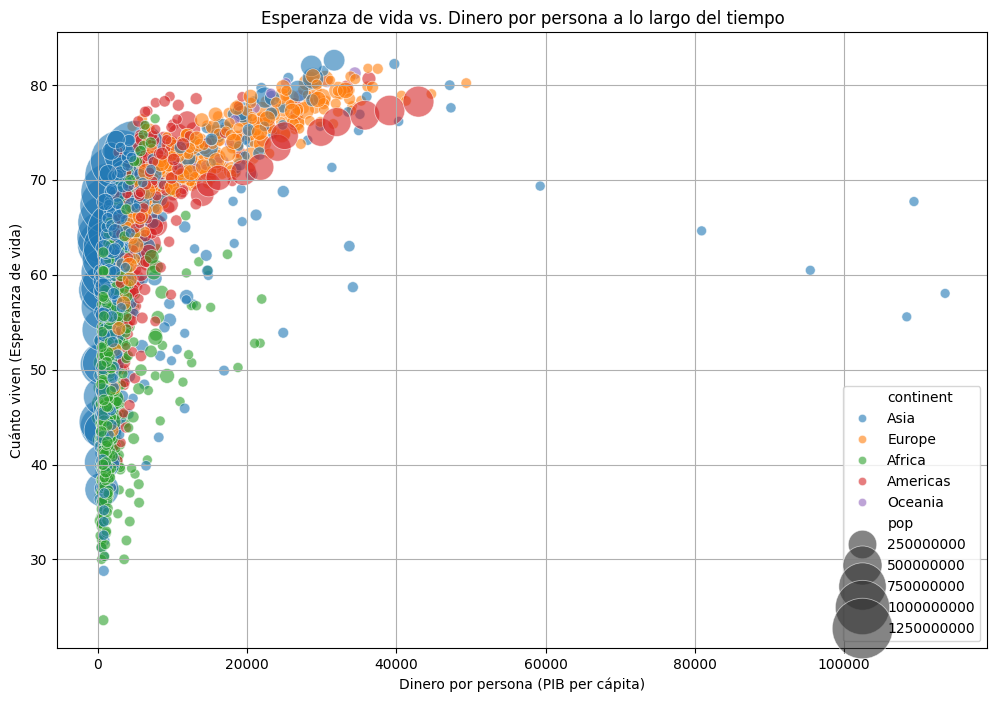

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_datos, x='gdpPercap', y='lifeExp', hue='continent', size='pop', sizes=(50, 2000), alpha=0.6)
plt.xlabel("Dinero por persona (PIB per cápita)")
plt.ylabel("Cuánto viven (Esperanza de vida)")
plt.title("Esperanza de vida vs. Dinero por persona a lo largo del tiempo")
plt.grid(True)
plt.show()

**Por qué hacemos esto**:
Importamos las librerías `matplotlib.pyplot` y `seaborn` para hacer los gráficos. El primer gráfico es de puntos. Muestra la relación entre cuánto dinero tiene la gente (`gdpPercap`) y cuánto viven (`lifeExp`). Los puntos tienen colores según el continente (`continent`) y su tamaño depende de cuánta gente hay (`pop`). Así podemos ver si hay alguna relación entre estas cosas.

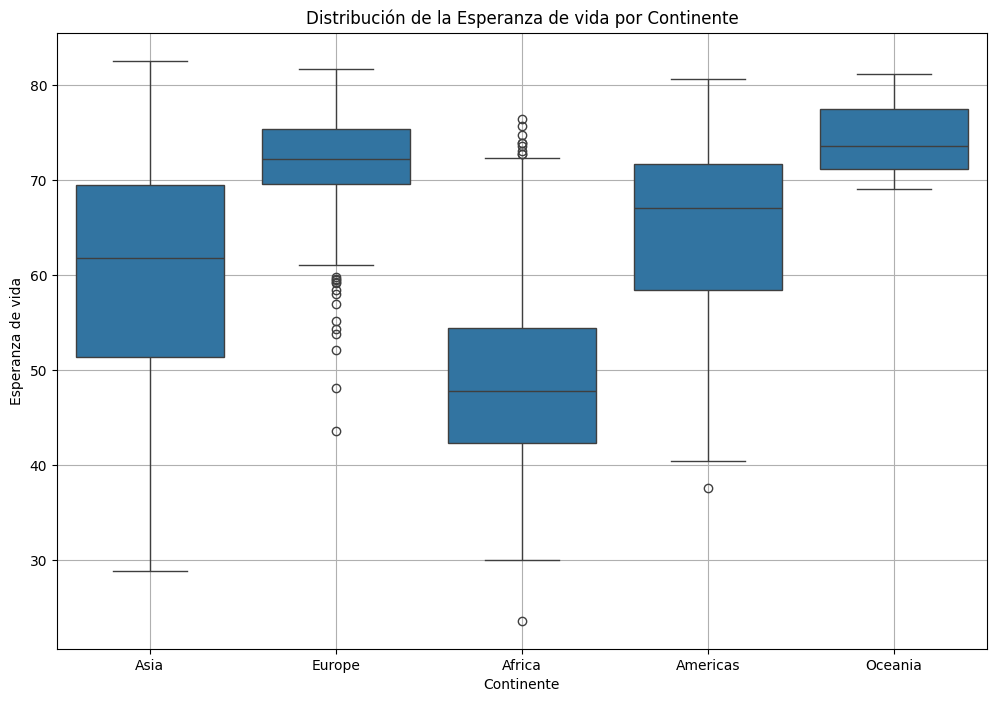

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_datos, x='continent', y='lifeExp')
plt.xlabel("Continente")
plt.ylabel("Esperanza de vida")
plt.title("Distribución de la Esperanza de vida por Continente")
plt.grid(True)
plt.show()

**Por qué hacemos esto**:
Este segundo gráfico es una "caja" (`boxplot`). Muestra cómo se distribuye cuánto vive la gente (`lifeExp`) en cada continente (`continent`). Las cajas nos ayudan a ver el promedio, dónde están la mayoría de los datos y si hay valores muy diferentes al resto.

* Creamos una nueva columna llamada: `gdp_per_million`
* Ahora dividimos `gdpPercap` en 1,000,000 y mostramos las primeras 5 filas para verificar los cambios.
* esto lo hacemos para que sea mas facil de analizar

In [29]:
df_datos['gdp_por_millon'] = df_datos['gdpPercap'] / 1_000_000
display(df_datos.head())

,country,year,pop,continent,lifeExp,gdpPercap,gdp_por_millon
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0.000779
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,0.000821
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,0.000853
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,0.000836
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,0.000740


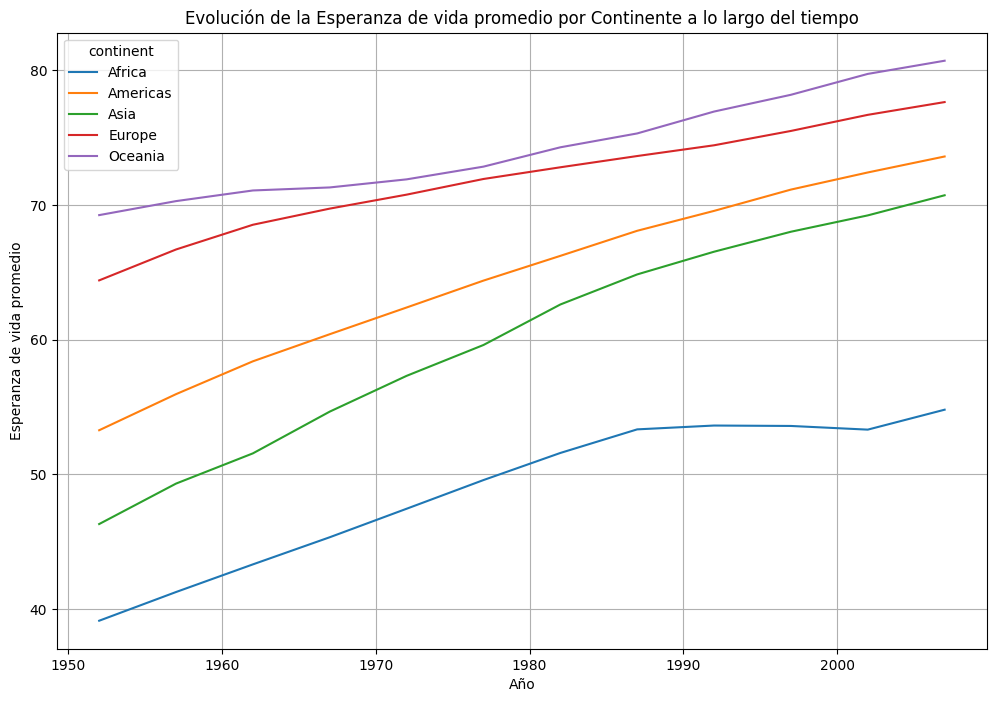

In [30]:
# 1. Gráfico de líneas para la evolución de la esperanza de vida por continente a lo largo del tiempo
df_lifeexp_time = df_datos.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_lifeexp_time, x='year', y='lifeExp', hue='continent')
plt.xlabel("Año")
plt.ylabel("Esperanza de vida promedio")
plt.title("Evolución de la Esperanza de vida promedio por Continente a lo largo del tiempo")
plt.grid(True)
plt.show()

/tmp/ipython-input-1191140199.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gdp_continent, x='continent', y='gdpPercap', palette='viridis')


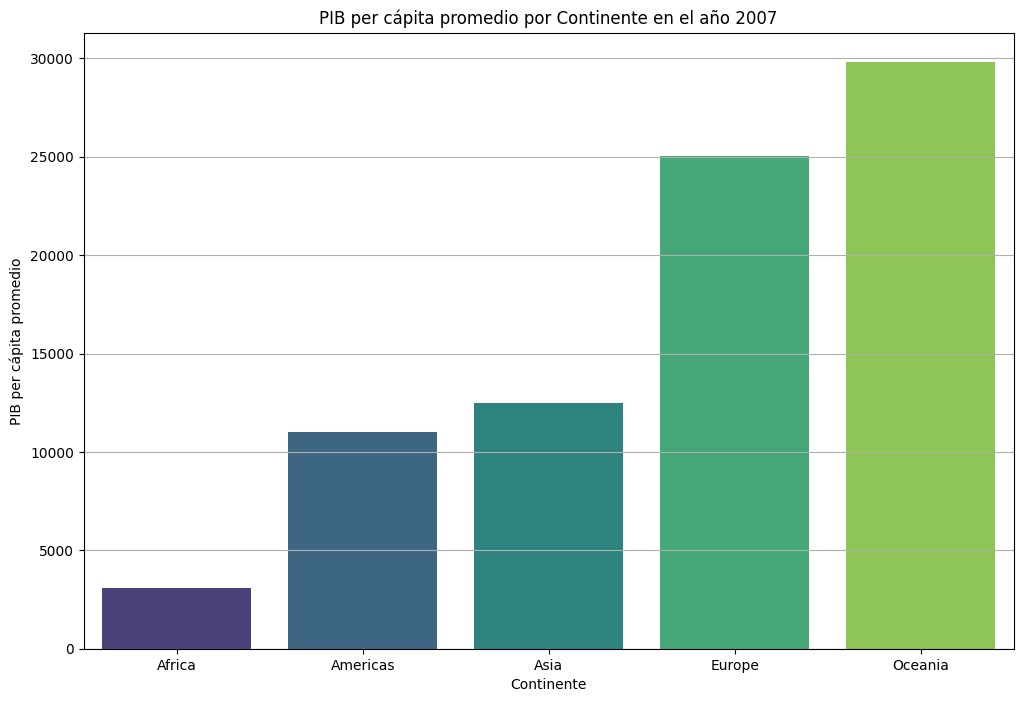

In [ ]:
# 2. Gráfico de barras para el PIB per cápita promedio por continente en el año más reciente
latest_year = df_datos['year'].max()
df_latest_year = df_datos[df_datos['year'] == latest_year]
df_gdp_continent = df_latest_year.groupby('continent')['gdpPercap'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=df_gdp_continent, x='continent', y='gdpPercap', palette='viridis')
plt.xlabel("Continente")
plt.ylabel("PIB per cápita promedio")
plt.title(f"PIB per cápita promedio por Continente en el año {latest_year}")
plt.grid(axis='y')
plt.show()

---
## Explicacion del codigo

modulos del codigo:
1.  Cargar los datos.
2.  Describirlos.
3.  Limpieza de datos.
4.  Mostrar graficos.

**Paso 1: Cargar datos**
Usamos la librería `pandas` para cargar nuestros datos de ejemplo desde internet.
(Mostrar los datos y sus resultados - `df_datos.head()`)
estas son las columnas del DF:
* país
* año
* población
* continente
* esperanza de vida
* dinero por persona (PIB per cápita).

**Paso 2: Mirar los datos al principio**
Es importante ver cómo son los datos antes de empezar.
* (Mostrar la celda `df_datos.head()`, `df_datos.info()`, `df_datos.describe()` y sus resultados)
* Vemos las primeras filas de nuevo, la información técnica (`.info()`) para saber tipos de datos y si faltan, y un resumen de los números (`.describe()`).

**Paso 3: Limpiar los datos**
Revisamos si hay datos repetidos o vacios.
en este caso no hay datos repetidos ni vacios, en caso de haberlos, se eliminarian.

**Paso 4: Cambiar los datos (si hace falta)**
A veces hacemos ajustes para que los datos sean más fáciles de usar o entender.
(Mostrar la celda de `gdp_por_millon` y su resultado)
Creamos una columna nueva, `gdp_por_millon`, dividiendo el PIB per cápita entre un millón. Esto simplifica el número para los gráficos.

**Paso 5: Hacer gráficos con los datos**
Finalmente, visualizamos los datos para ver patrones.
* Este gráfico de puntos muestra la relación entre dinero (eje X) y esperanza de vida (eje Y).
* El color es el continente y el tamaño es la población. Nos ayuda a ver si más dinero significa más vida y diferencias por continente.